<a href="https://colab.research.google.com/github/ahmadbadawikr/AlgoWiki/blob/master/Image%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from keras.datasets import cifar10
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [9]:
#Print the data types
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [11]:
#Get the shapes
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


In [12]:
#Take a look at the first image at index=0 in the training dataset
X_train[0]


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

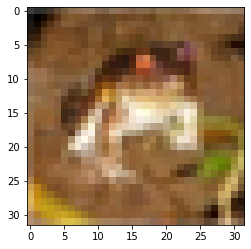

In [15]:
#Show image as a picture
img = plt.imshow(X_train[0])

In [16]:
#Print the label of the image
print('The label is:', y_train[0])

The label is: [6]


In [21]:
#One hot encoding, convert the labels into a set of 10 numbers to input to neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


#Print new labels in the training dataset
print(y_train_one_hot)
print()
print(y_test_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [23]:
#Print an example of the new labels
print('The one hot label is:', y_train_one_hot[0])

The one hot label is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
#Normalize the pixels in the images to the values beetwen 0 and 1
X_train = X_train/255
X_test = X_test/255

In [0]:
#Build the CNN 
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#Create the Architecture
model = Sequential()

#Convolution Layer
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))

#MaxPooling Layes
model.add( MaxPooling2D(pool_size=(2,2)))

#Convolution Layer
model.add( Conv2D(32, (5,5), activation='relu'))

#MaxPooling Layes
model.add( MaxPooling2D(pool_size=(2,2)))

#Flatten Layer
model.add( Flatten())

model.add( Dense(1000, activation='relu'))
model.add( Dense(10, activation='softmax'))

In [0]:
#Compile the Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
#Train the Model
hist = model.fit(X_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 51s 1ms/step - loss: 1.7216 - accuracy: 0.3755 - val_loss: 1.4828 - val_accuracy: 0.4653
Epoch 2/10
35000/35000 [==============================] - 50s 1ms/step - loss: 1.3788 - accuracy: 0.5056 - val_loss: 1.3166 - val_accuracy: 0.5299
Epoch 3/10
35000/35000 [==============================] - 49s 1ms/step - loss: 1.2417 - accuracy: 0.5610 - val_loss: 1.2250 - val_accuracy: 0.5646
Epoch 4/10
35000/35000 [==============================] - 49s 1ms/step - loss: 1.1193 - accuracy: 0.6053 - val_loss: 1.1842 - val_accuracy: 0.5845
Epoch 5/10
35000/35000 [==============================] - 49s 1ms/step - loss: 1.0445 - accuracy: 0.6352 - val_loss: 1.0981 - val_accuracy: 0.6132
Epoch 6/10
35000/35000 [==============================] - 49s 1ms/step - loss: 0.9628 - accuracy: 0.6639 - val_loss: 1.0955 - val_accuracy: 0.6230
Epoch 7/10
35000/35000 [==============================] - 49s 1ms/st

In [30]:
#Get the models accuracy
model.evaluate(X_test, y_test_one_hot)[1]

10000/10000 [==============================] - 4s 448us/step


0.666700005531311

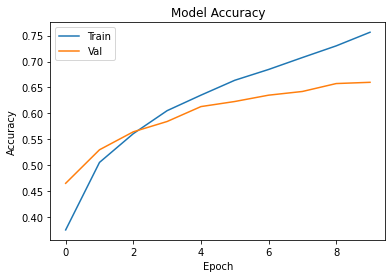

In [35]:
#Visualize the model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

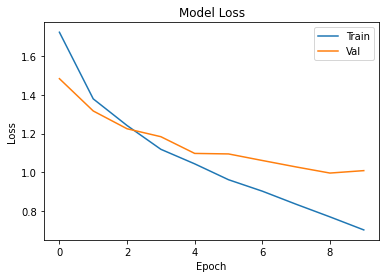

In [37]:
#Visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [41]:
#Load the data
from google.colab import files
uploaded = files.upload()
my_image = plt.imread('_111434467_gettyimages-1143489763.jpg')

Saving _111434467_gettyimages-1143489763.jpg to _111434467_gettyimages-1143489763 (1).jpg


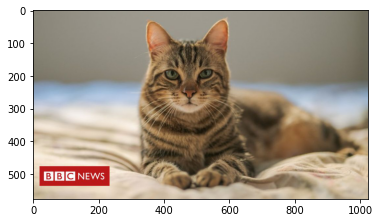

In [42]:
#Show the uploaded image
img = plt.imshow(my_image)

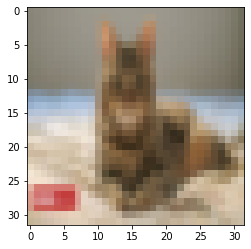

In [43]:
#Resize the image
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))
img = plt.imshow(my_image_resized)

In [46]:
#Get the probabilities for each class
import numpy as np
probabilities = model.predict( np.array([my_image_resized,]))

#print the probabilities
probabilities


array([[4.04121960e-03, 1.28689171e-05, 1.17191605e-01, 3.10873389e-01,
        2.39110976e-01, 1.37792900e-01, 2.32029948e-02, 1.42409667e-01,
        2.13841405e-02, 3.98030039e-03]], dtype=float32)

In [50]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print('Most likely class:' ,number_to_class[index[9]], '--probability:', probabilities[0, index[9]])
print('Second most likely class:' ,number_to_class[index[8]], '--probability:', probabilities[0, index[8]])
print('Third most likely class:' ,number_to_class[index[7]], '--probability:', probabilities[0, index[7]])
print('Fourth most likely class:' ,number_to_class[index[6]], '--probability:', probabilities[0, index[6]])
print('Fifth most likely class:' ,number_to_class[index[5]], '--probability:', probabilities[0, index[5]])

Most likely class: cat --probability: 0.3108734
Second most likely class: deer --probability: 0.23911098
Third most likely class: horse --probability: 0.14240967
Fourth most likely class: dog --probability: 0.1377929
Fifth most likely class: bird --probability: 0.117191605


In [0]:
#Save the model
model.save('my_model.h5')

In [0]:
#Load the model
from keras.models import load_model
model = load_model('my_model.h5')